<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/ImagePredictionCIFAR_10(day20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f"Training Data: {x_train.shape}, Testing Data: {x_test.shape}")

Training Data: (50000, 32, 32, 3), Testing Data: (10000, 32, 32, 3)


In [4]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential

def create_model():
  model=Sequential([
      Conv2D(32,(3,3),activation='relu', input_shape=(32, 32, 3)),
      MaxPooling2D((2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [6]:
model=create_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.3049 - loss: 1.8494 - val_accuracy: 0.5363 - val_loss: 1.2817
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.5325 - loss: 1.3023 - val_accuracy: 0.5997 - val_loss: 1.1252
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.5995 - loss: 1.1357 - val_accuracy: 0.6254 - val_loss: 1.0751
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.6444 - loss: 1.0187 - val_accuracy: 0.6553 - val_loss: 0.9729
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.6751 - loss: 0.9331 - val_accuracy: 0.6731 - val_loss: 0.9281
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.7023 - loss: 0.8589 - val_accuracy: 0.6921 - val_loss: 0.8962
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.7220 - loss: 0.8095 - val_accuracy: 0.6825 - val_loss: 0.8900
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7404 -

In [8]:
import cv2
def pre_process_image(image_path):
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (32, 32))
  img = img / 255.0
  img = np.expand_dims(img, axis=0)
  return img

In [11]:
import matplotlib.pyplot as plt
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]
def predict_image(image_path):
  img = pre_process_image(image_path)
  predictions = model.predict(img)[0]

  top_3_indices = np.argsort(predictions)[-3:][::-1]
  top_3_classes = [class_names[i] for i in top_3_indices]
  top_3_probs = [predictions[i] for i in top_3_indices]

  plt.imshow(cv2.imread(image_path)[..., ::-1])
  plt.axis('off')
  plt.title("Predictions:\n" + "\n".join([f"{top_3_classes[i]}: {top_3_probs[i]:.2%}" for i in range(3)]))
  plt.show()

  for i in range(3):
    print(f"{i+1}. {top_3_classes[i]}: {top_3_probs[i]:.2%}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


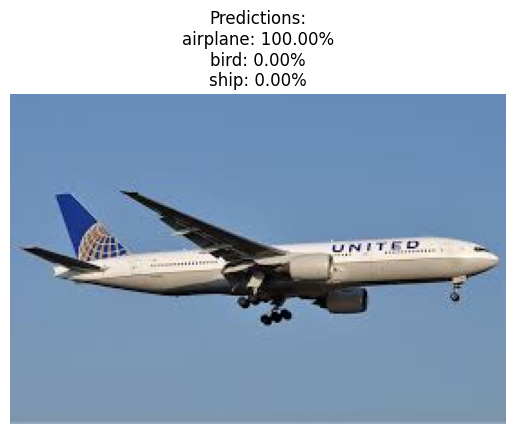

1. airplane: 100.00%
2. bird: 0.00%
3. ship: 0.00%


In [12]:
image_path='_1.jpg'
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


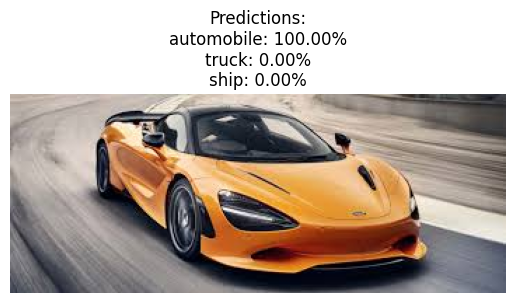

1. automobile: 100.00%
2. truck: 0.00%
3. ship: 0.00%


In [13]:
image_path='car.jpg'
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


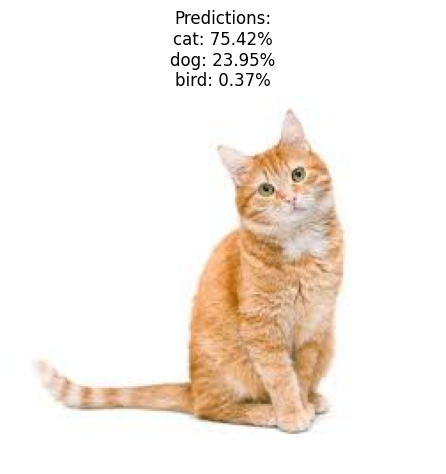

1. cat: 75.42%
2. dog: 23.95%
3. bird: 0.37%


In [14]:
image_path='cat.jpg'
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


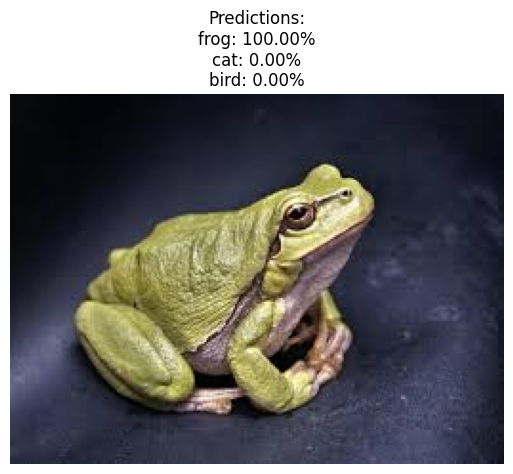

1. frog: 100.00%
2. cat: 0.00%
3. bird: 0.00%


In [15]:
image_path='frog.jpg'
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


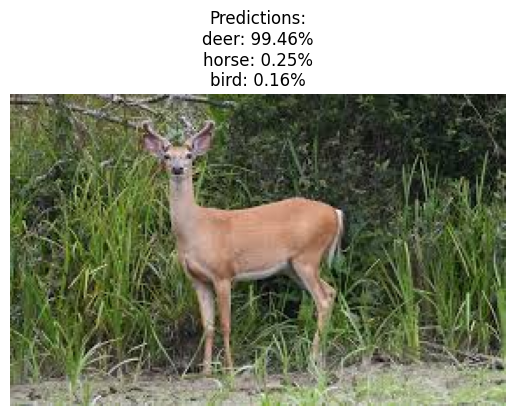

1. deer: 99.46%
2. horse: 0.25%
3. bird: 0.16%


In [16]:
image_path='deer.jpg'
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


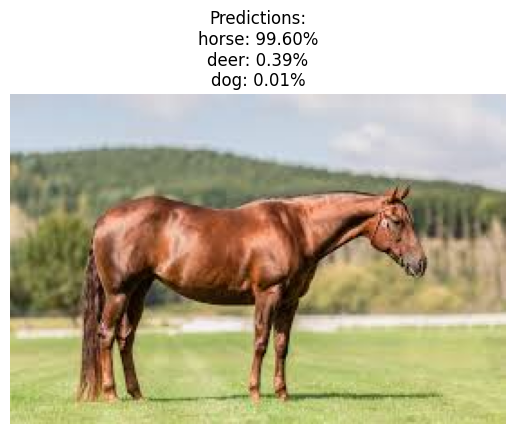

1. horse: 99.60%
2. deer: 0.39%
3. dog: 0.01%


In [17]:
image_path='hprse.jpg'
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


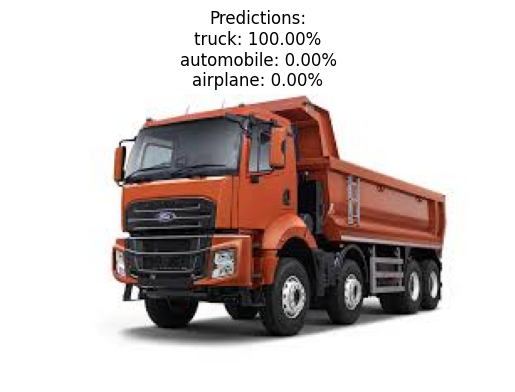

1. truck: 100.00%
2. automobile: 0.00%
3. airplane: 0.00%


In [18]:
image_path='truck.jpg'
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


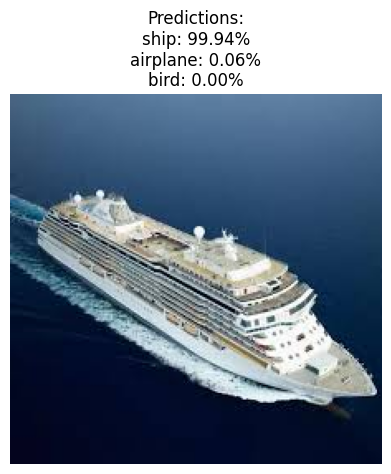

1. ship: 99.94%
2. airplane: 0.06%
3. bird: 0.00%


In [19]:
image_path='ship.jpg'
predict_image(image_path)